In [31]:
!unzip detection_results.zip -d ./results


/home/jovyan/RoadSafety


In [1]:
!pwd

/home/jovyan/RoadSafety


In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import pandas as pd
import shutil
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
def get_dimensions(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    size = root.find("size")
    w = int(size.find("width").text)
    h = int(size.find("height").text)
    return w,h
    
def create_df(path):
    file_names = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]    
    df = pd.DataFrame(file_names, columns=['File Name'])
    df['File Name'] = df['File Name'].apply(lambda x: os.path.splitext(x)[0])
    return df


In [9]:
%cd results

/home/jovyan/RoadSafety/results


In [3]:
def image_to_vector(df):
    for index, row in df.iterrows():
        image_name = df.at[index, 'File Name']+".xml"
        xml_path = os.path.join("./../Japan/train/annotations/xmls/", image_name)
        txt_path =  os.path.join("labels", image_name.replace(".xml", ".txt"))
        print(xml_path)
        print(txt_path)
        if os.path.exists(xml_path):
            w, h = get_dimensions(xml_path)
            print(w)
            df.at[index, 'Width'] = w
            df.at[index, 'Height'] = h
        counts = np.zeros(7)
        weights = np.zeros(7)
        if os.path.exists(txt_path):
            with open(txt_path, 'r') as file:
                
                for line in file:
                    label, x_center, y_center, width, height = line.strip().split(' ')
                    counts[int(label)] += 1
                    area = float(width) * float(height)
                    weights[int(label)] += area
        df.at[index, 'Counts'] = counts
        df.at[index, 'Areas'] = weights
        
                

In [10]:
df =  create_df(".")
df

,File Name
0,Japan_000003
1,Japan_000009
2,Japan_000015
3,Japan_000032
4,Japan_000034
...,...
1045,Japan_013063
1046,Japan_013070
1047,Japan_013106
1048,Japan_013120


In [11]:
df['Counts'] = [np.zeros(7) for _ in range(len(df))]
df['Areas'] = [np.zeros(7) for _ in range(len(df))]
df['Width'] = 0
df['Height'] = 0


In [12]:
df

,File Name,Counts,Areas,Width,Height
0,Japan_000003,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0
1,Japan_000009,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0
2,Japan_000015,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0
3,Japan_000032,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0
4,Japan_000034,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0
...,...,...,...,...,...
1045,Japan_013063,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0
1046,Japan_013070,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0
1047,Japan_013106,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0
1048,Japan_013120,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0


In [ ]:
image_to_vector(df)

In [16]:
df[df['Height'] != 600 ]

,File Name,Counts,Areas,Width,Height
36,Japan_000396,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1080,1080
72,Japan_000723,"[0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.00569056871338, 0.0, 0.0, 0.0]",1024,1024
80,Japan_000825,"[1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0]","[0.01808734729, 0.0, 0.0, 0.013299943041989998...",1024,1024
143,Japan_001611,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1024,1024
150,Japan_001725,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.036075628662, 0.0, 0.0, 0.0]",1024,1024
299,Japan_003784,"[0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0]","[0.0, 0.0, 0.082843000583, 0.0, 0.0, 0.1904423...",1080,1080
407,Japan_005003,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",540,540
420,Japan_005130,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.008283616528320001, 0.0, 0.0...",1024,1024
457,Japan_005649,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1080,1080
459,Japan_005678,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",540,540


In [19]:
df['Rating Vector'] = df['Counts']*df['Areas']
df['Rating'] = df['Rating Vector'].apply(lambda x: np.sum(x))

df_sorted = df.sort_values(by='Rating', ascending=False)
df

,File Name,Counts,Areas,Width,Height,Rating Vector,Rating
0,Japan_000003,"[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.235075252, 0.0, 0.0, 0.0, 0.0]",600,600,"[0.0, 0.0, 0.470150504, 0.0, 0.0, 0.0, 0.0]",0.470151
1,Japan_000009,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.033761233889, 0.0, 0.0, 0.0, 0.0]",600,600,"[0.0, 0.0, 0.033761233889, 0.0, 0.0, 0.0, 0.0]",0.033761
2,Japan_000015,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",600,600,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000
3,Japan_000032,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.054766615, 0.0, 0.044444588889, 0.0, 0.0, 0...",600,600,"[0.054766615, 0.0, 0.044444588889, 0.0, 0.0, 0...",0.099211
4,Japan_000034,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.021183385000000002...",600,600,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.021183385000000002...",0.021183
...,...,...,...,...,...,...,...
1045,Japan_013063,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.00563888761111, 0.0, 0.0, 0.0]",600,600,"[0.0, 0.0, 0.0, 0.00563888761111, 0.0, 0.0, 0.0]",0.005639
1046,Japan_013070,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",600,600,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000
1047,Japan_013106,"[2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.110058339, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",600,600,"[0.220116678, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.220117
1048,Japan_013120,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",600,600,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0.000000


In [17]:
df_sorted

NameError: name 'df_sorted' is not defined

In [102]:
rating_vectors = np.array(df['Rating Vector'].tolist())
rating_vectors

array([[0.        , 0.        , 0.4701505 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03376123, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.22011668, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

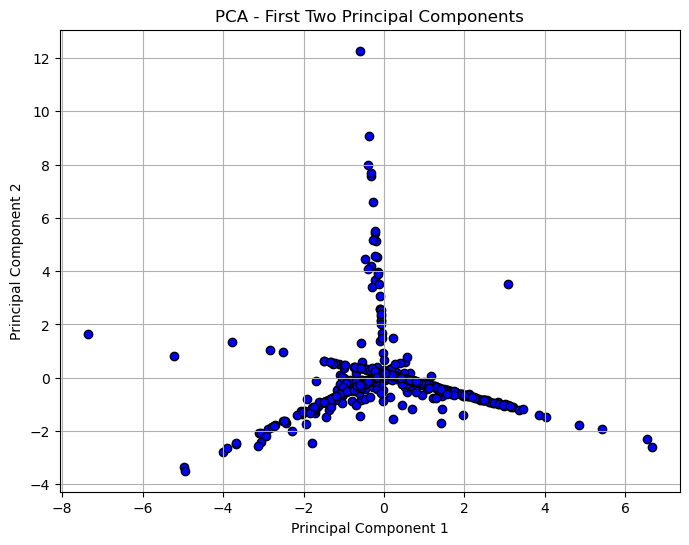

In [127]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o', edgecolors='black')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [150]:
pca = PCA(n_components=3)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(rating_vectors)
pca_result = pca.fit_transform(scaled_data)

print("Transformed Data (PCA Result):")
print(pca_result)

# Print explained variance ratio to see how much variance each component explains
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

Transformed Data (PCA Result):
[[ 2.61534394 -0.89251183  0.05813876]
 [ 0.2060398   0.09171816 -0.04541938]
 [ 0.01964411  0.16786306 -0.05343115]
 ...
 [-1.34340252  0.59300208 -2.38787429]
 [ 0.01964411  0.16786306 -0.05343115]
 [ 0.01964411  0.16786306 -0.05343115]]

Explained Variance Ratio:
[0.16137117 0.15055106 0.14732302]


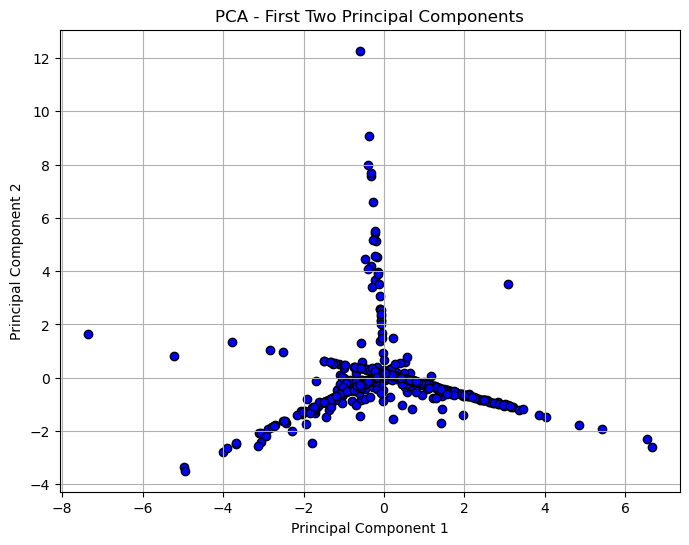

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', marker='o', edgecolors='black')
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Transformed Data (PCA Result):
[[ 2.61534394 -0.89251183  0.05813876]
 [ 0.2060398   0.09171816 -0.04541938]
 [ 0.01964411  0.16786306 -0.05343115]
 ...
 [-1.34340252  0.59300208 -2.38787429]
 [ 0.01964411  0.16786306 -0.05343115]
 [ 0.01964411  0.16786306 -0.05343115]]

Explained Variance Ratio:
[0.16137117 0.15055106 0.14732302]


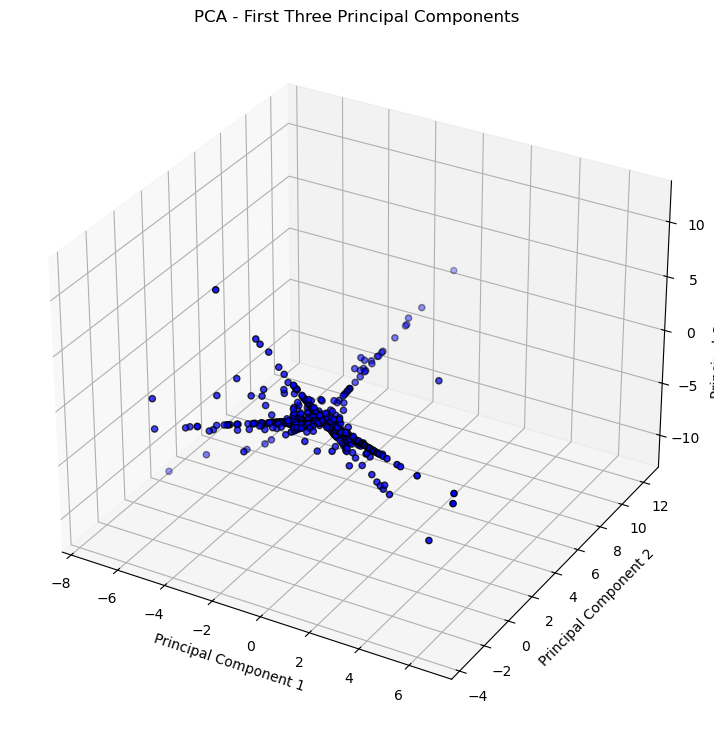

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(rating_vectors)
pca_result = pca.fit_transform(scaled_data)

print("Transformed Data (PCA Result):")
print(pca_result)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c='blue', marker='o', edgecolors='black')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('PCA - First Three Principal Components')
plt.show()


4


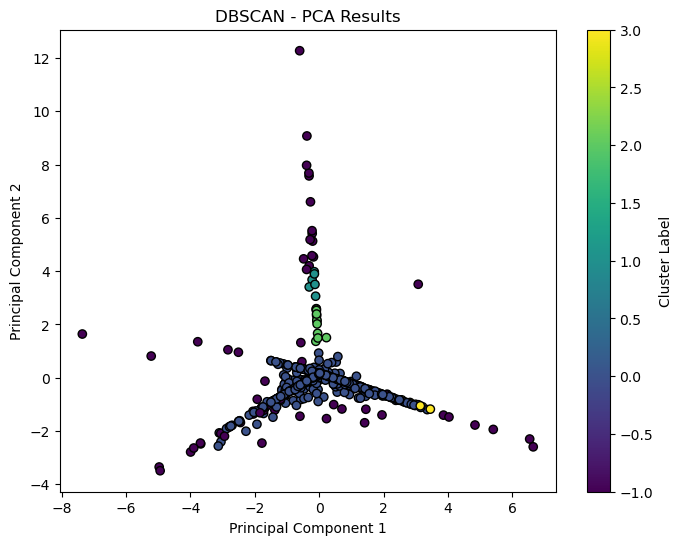

In [154]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(pca_result)

num_clusters = len(np.unique(labels[labels != -1]))
print(num_clusters)

plt.figure(figsize=(8, 6))

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='black')

plt.title('DBSCAN - PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.colorbar(label='Cluster Label')
plt.show()
